In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
from sklearn import tree
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
train_data = pd.read_csv('data/finaldf_train.csv')
test_data = pd.read_csv('data/finaldf_test.csv')

# Assign a binary label based on the condition
train_data['Profitability'] = np.where(train_data['revenue_adj'] > train_data['budget_adj'], 1, 0)
test_data['Profitability'] = np.where(test_data['revenue_adj'] > test_data['budget_adj'], 1, 0)


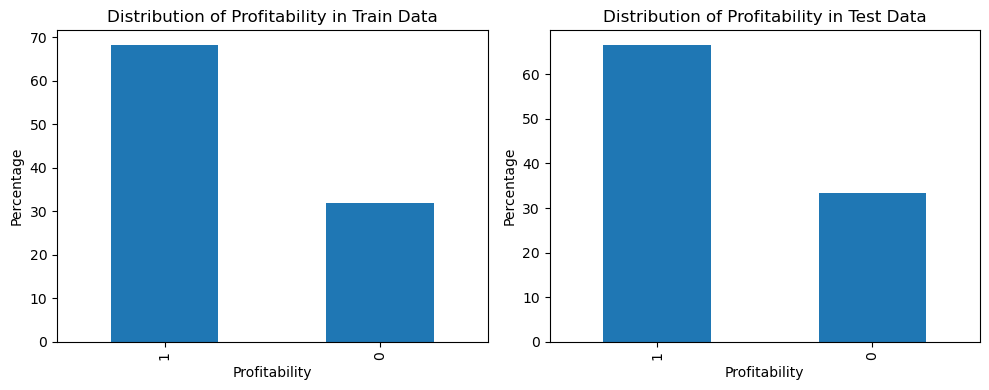

In [5]:
# Calculate the percentage of each profitability category in the train data
train_data_profitability_percentage = train_data['Profitability'].value_counts(normalize=True) * 100

# Calculate the percentage of each profitability category in the test data
test_data_profitability_percentage = test_data['Profitability'].value_counts(normalize=True) * 100

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot the distribution of profitability in the train data
train_data_profitability_percentage.plot(kind='bar', ax=ax1)
ax1.set_title('Distribution of Profitability in Train Data')
ax1.set_xlabel('Profitability')
ax1.set_ylabel('Percentage')

# Plot the distribution of profitability in the test data
test_data_profitability_percentage.plot(kind='bar', ax=ax2)
ax2.set_title('Distribution of Profitability in Test Data')
ax2.set_xlabel('Profitability')
ax2.set_ylabel('Percentage')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


In [6]:
train_data.head(5)

,Unnamed: 0,id,runtime,title,budget_adj,revenue_adj,Action,Adventure,Animation,Comedy,...,Topic_Topic 10,Topic_Topic 2,Topic_Topic 3,Topic_Topic 4,Topic_Topic 5,Topic_Topic 6,Topic_Topic 7,Topic_Topic 8,Topic_Topic 9,Profitability
0,0,11507.0,114.0,Body Double,5.208150e+07,4.584182e+07,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,106.0,107.0,Predator,7.849182e+07,4.283715e+08,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,2,10400.0,146.0,The Hurricane,9.570920e+07,1.415659e+08,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,3,10894.0,93.0,May,8.659342e+05,2.602600e+05,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,434119.0,125.0,Confidential Assignment,8.727888e+06,5.746884e+07,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [7]:

# Normalize 'budget_adj'
train_data['budget_adj_log'] = np.log10(train_data['budget_adj'])
test_data['budget_adj_log'] = np.log10(test_data['budget_adj'])

# Normalize 'runtime', 'total_cast' using StandardScaler. Scale on Train data. Fit in train and test

rscaler = StandardScaler()
rscaler.fit(train_data[['runtime']])
train_data['runtime'] = rscaler.transform(train_data[['runtime']])
test_data['runtime'] = rscaler.transform(test_data[['runtime']])

rscaler = StandardScaler()
rscaler.fit(train_data[['total_cast']])
train_data['total_cast'] = rscaler.transform(train_data[['total_cast']])
test_data['total_cast'] = rscaler.transform(test_data[['total_cast']])

# List of columns to drop: 1st row due to unnecessity
# Country is drop due to highly correlation with language . drop to remove affect to feature importances
columns_to_drop = ['Profitability', 'id', 'title', 'Unnamed: 0', 'revenue_adj', 'budget_adj', 'series_ind', 
                   'United States of America', 'United Kingdom', 'France', 'Germany', 'Canada', 'India',
                   'Australia','Italy', 'Russia', 'Japan', 'Other Country' 
                   #'original_language_others', 'quarter_4', 'Topic_Topic 10'
                  ]

# Set Profitability as Y, drop columns_to_drop from X

X_train = train_data.drop(columns_to_drop, axis=1)
y_train = train_data['Profitability']

X_test = test_data.drop(columns_to_drop, axis=1)
y_test = test_data['Profitability']


In [8]:
#Check missing data
#Set the option to display all columns
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# Calculate the sum of null values for each column
#test_data.isnull().sum()

## Fit a Decision Tree without any constraints

In [9]:
# Create an instance of the DecisionTreeClassifier
classifier = DecisionTreeClassifier()

# Set a random seed for reproducibility
np.random.seed(2023)

# Fit the classifier to the training data
classifier.fit(X_train, y_train)

# Use the trained classifier to make predictions on the test data
predictions = classifier.predict(X_test)

# Calculate train accuracy
train_accuracy = accuracy_score(y_train, classifier.predict(X_train))
print("Train Accuracy:", train_accuracy)

# Calculate the accuracy of the model on the test data
test_accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy:", test_accuracy)

# Generate the classification report
report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)

Train Accuracy: 1.0
Test Accuracy: 0.6141078838174274
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.41      0.41       484
           1       0.71      0.72      0.71       962

    accuracy                           0.61      1446
   macro avg       0.56      0.56      0.56      1446
weighted avg       0.61      0.61      0.61      1446



**Without any constraints, the model is overfitting, baddly perform on Test data**

In [10]:
# Access the max_depth, min_samples_split, and min_samples_leaf values
max_depth = classifier.max_depth
min_samples_split = classifier.min_samples_split
min_samples_leaf = classifier.min_samples_leaf

# Print the values
print("max_depth:", max_depth)
print("min_samples_split:", min_samples_split)
print("min_samples_leaf:", min_samples_leaf)

max_depth: None
min_samples_split: 2
min_samples_leaf: 1


## Random Search

Use Random Search to find the best parameters

In [11]:
# Define the parameter distribution
param_dist = {
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 4)
}

# Perform randomized search cross-validation
randomized_search = RandomizedSearchCV(classifier, param_distributions=param_dist, n_iter=20, cv=5, random_state=2023)
randomized_search.fit(X_train, y_train)

# Get the best parameters
best_params = randomized_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 3}


In [12]:
# Create an instance of the DecisionTreeClassifier with the best parameters above
classifier_rs = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                         min_samples_split=best_params['min_samples_split'],
                                         min_samples_leaf=best_params['min_samples_leaf'],
                                         random_state=2023)

# Fit the classifier to the training data
classifier_rs.fit(X_train, y_train)

# Use the trained classifier to make predictions on the test data
predictions_rs = classifier_rs.predict(X_test)

# Calculate the accuracy of the model
train_accuracy_rs = accuracy_score(y_train, classifier_rs.predict(X_train))
test_accuracy_rs = accuracy_score(y_test, predictions_rs)

print("Train Accuracy Random Search:", train_accuracy_rs)
print("Test Accuracy Random Search:", test_accuracy_rs)

# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions_rs)
print("Confusion Matrix:")
print(cm)

# Generate the classification report
report_rs = classification_report(y_test, predictions_rs)
print("Classification Report RS:")
print(report_rs)

Train Accuracy Random Search: 0.7078784302154028
Test Accuracy Random Search: 0.6639004149377593
Confusion Matrix:
[[101 383]
 [103 859]]
Classification Report RS:
              precision    recall  f1-score   support

           0       0.50      0.21      0.29       484
           1       0.69      0.89      0.78       962

    accuracy                           0.66      1446
   macro avg       0.59      0.55      0.54      1446
weighted avg       0.63      0.66      0.62      1446



In [13]:
# Define the parameter grid for RandomizedSearchCV
param_grid = [
    {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2, 3, 4, 5], 'min_samples_split': [5]},
    {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [3], 'min_samples_split': [3, 5, 7, 9]}
]

# Perform random search with cross-validation
rd_clf = RandomizedSearchCV(
    tree.DecisionTreeClassifier(),
    param_grid,
    cv=model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=2023),
    n_iter=30,
    random_state=2023
)

# Fit the random search on the training data
rd_clf.fit(X_train, y_train)

# Get the best model from RandomizedSearchCV
rd_best = rd_clf.best_estimator_

# Make predictions on the train data using the best model
y_train_pred = rd_best.predict(X_train)

# Calculate the train accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)

# Make predictions on the test data using the best model
y_pred = rd_best.predict(X_test)

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Train Accuracy: 0.7037474181174388
Test Accuracy: 0.6763485477178424
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.17      0.26       484
           1       0.69      0.93      0.79       962

    accuracy                           0.68      1446
   macro avg       0.62      0.55      0.53      1446
weighted avg       0.64      0.68      0.61      1446



**The model performs slightly better with random search. In fact, recall is high 0.93 for positive label but low for negative label (0.17).**

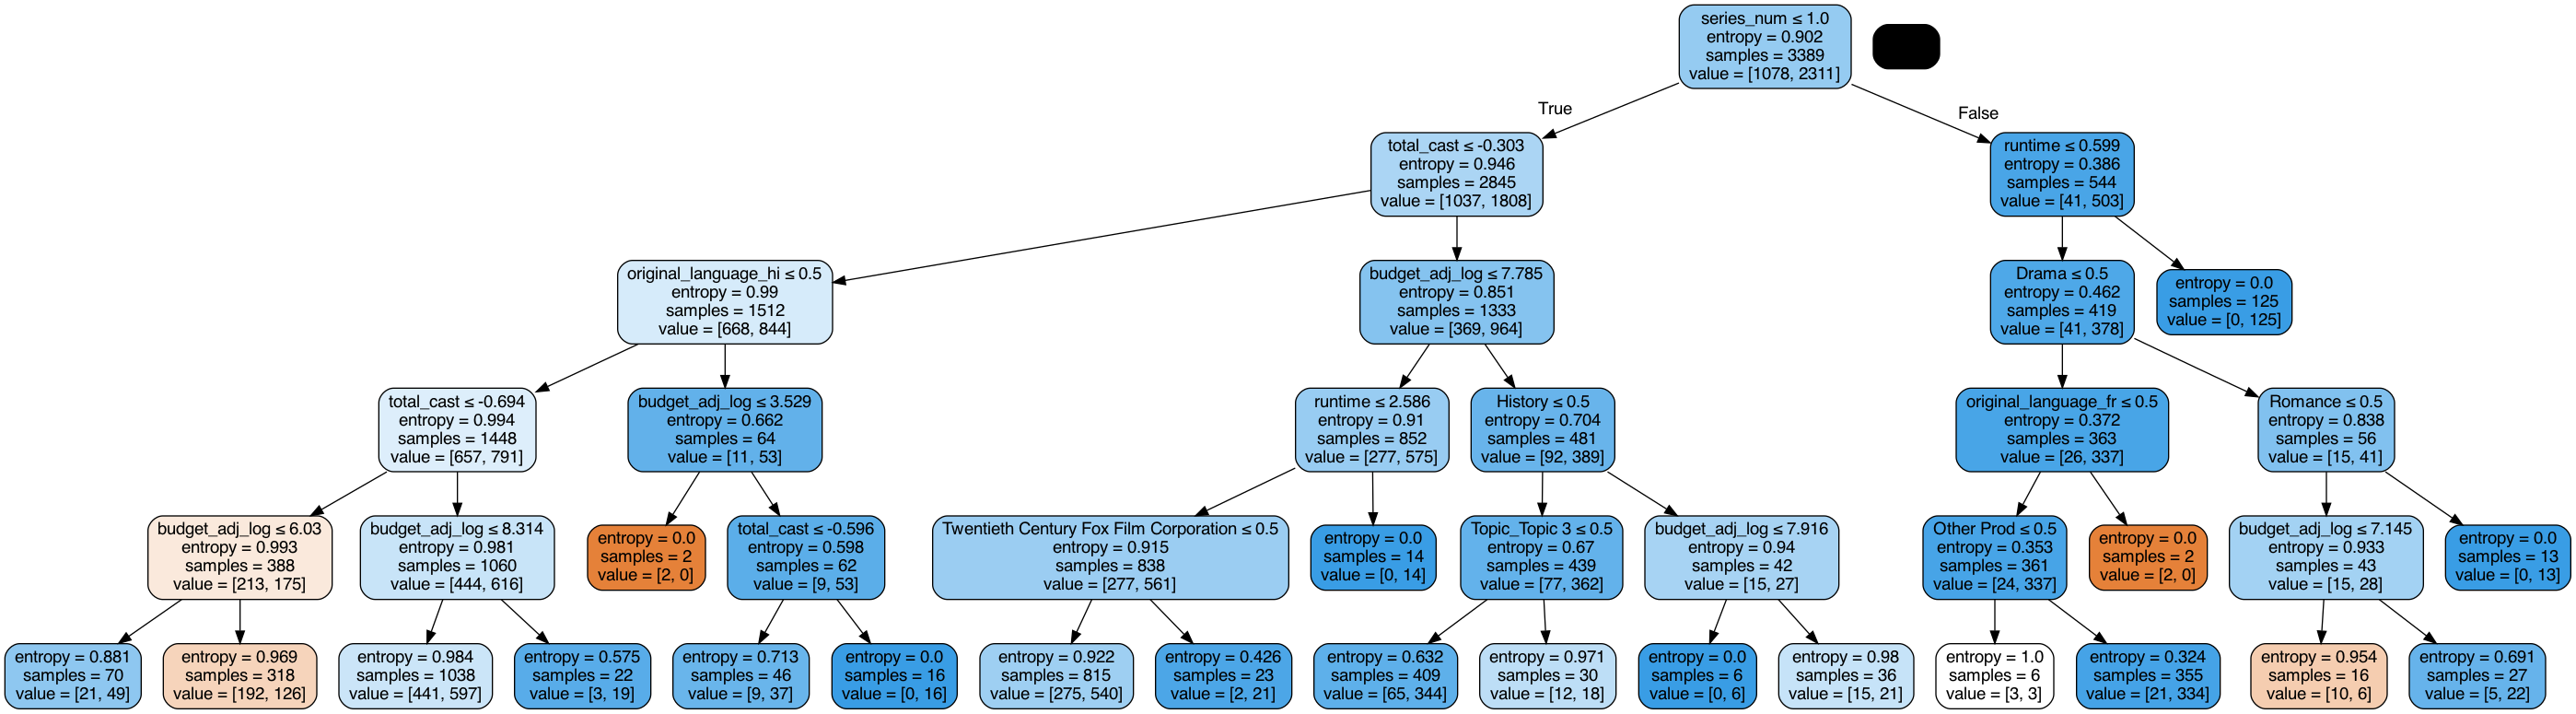

In [14]:

# Export the decision tree as a DOT file
dot_data = export_graphviz(rd_best, out_file=None, filled=True, rounded=True, special_characters=True, feature_names=X_train.columns)

# Generate the visualization from the DOT file
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the decision tree
Image(graph.create_png())


## Grid Search

In [15]:
# Grid search with cross validation
parameters = [
    {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [5]},
    {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [3], 'min_samples_split': [3, 5, 7, 9]}
]

clf = model_selection.GridSearchCV(
    tree.DecisionTreeClassifier(), parameters, cv=model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=2023))
clf.fit(X_train, y_train)

print('best parameters:', clf.best_params_)

# Get the best model from GridSearchCV
gr_best = clf.best_estimator_

# Make predictions on the train data using the best model
y_train_pred = gr_best.predict(X_train)

# Make predictions on the test data using the best model
y_pred = gr_best.predict(X_test)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5, 'splitter': 'best'}
Training Accuracy: 0.7081735025081145
Test Accuracy: 0.6673582295988935
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.20      0.29       484
           1       0.69      0.90      0.78       962

    accuracy                           0.67      1446
   macro avg       0.60      0.55      0.54      1446
weighted avg       0.63      0.67      0.62      1446



## Bayesian Optimization

In [16]:
from skopt.space import Real, Integer, Categorical
from skopt import BayesSearchCV

import warnings
warnings.filterwarnings("ignore", message="The objective has been evaluated at this point before.")

# Define the search space
search_spaces = {
    'criterion': Categorical(['gini', 'entropy']),
    'splitter': Categorical(['best', 'random']),
    'max_depth': Integer(2, 5),
    'min_samples_split': Integer(3, 9)
}

bo_clf = BayesSearchCV(
    tree.DecisionTreeClassifier(),
    search_spaces,
    n_iter=20,
    random_state=2023,
    verbose=0,
    cv=model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=2023)
)

bo_clf.fit(X_train, y_train)

print('best parameters:', bo_clf.best_params_)

# Get the best model from BayesSearchCV
bo_best = bo_clf.best_estimator_

# Make predictions on the train data using the best model
y_train_pred = bo_best.predict(X_train)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Make predictions on the test data using the best model
y_pred = bo_best.predict(X_test)

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


best parameters: OrderedDict([('criterion', 'entropy'), ('max_depth', 5), ('min_samples_split', 3), ('splitter', 'best')])
Training Accuracy: 0.7037474181174388
Test Accuracy: 0.6763485477178424
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.17      0.26       484
           1       0.69      0.93      0.79       962

    accuracy                           0.68      1446
   macro avg       0.62      0.55      0.53      1446
weighted avg       0.64      0.68      0.61      1446



## Ensemble model

## Random Forest 

In [17]:
# Create an instance of RandomForestClassifier, only set n_estimators
random_forest = ensemble.RandomForestClassifier(n_estimators=200, oob_score=True, random_state=2023)

# Fit the RandomForestClassifier to the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest.predict(X_test)

# Calculate the accuracy on the train data
train_accuracy = accuracy_score(y_train, random_forest.predict(X_train))
print("Train Accuracy:", train_accuracy)

# Calculate the accuracy on the test data
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)



Train Accuracy: 1.0
Test Accuracy: 0.6881051175656985
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.28      0.37       484
           1       0.71      0.89      0.79       962

    accuracy                           0.69      1446
   macro avg       0.64      0.59      0.58      1446
weighted avg       0.66      0.69      0.65      1446



**The model is overfitting with Train Accuracy = 1**

In [18]:
from sklearn.model_selection import StratifiedKFold

# Define the parameter grid for Random Forest, involve more parameters
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Create an instance of RandomForestClassifier
random_forest = RandomForestClassifier(oob_score=True, random_state=2023)

# Create a StratifiedKFold object with the desired number of folds
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=2023)

# Create a GridSearchCV object with the random forest classifier, parameter grid, and StratifiedKFold
grid_search = GridSearchCV(random_forest, rf_param_grid, cv=stratified_kfold)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
rf_best = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = rf_best.predict(X_test)

# Calculate the accuracy on the train data
train_accuracy = accuracy_score(y_train, rf_best.predict(X_train))
print("Train Accuracy:", train_accuracy)

# Calculate the accuracy on the test data
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Train Accuracy: 0.8256122750073768
Test Accuracy: 0.7019363762102351
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.23      0.34       484
           1       0.71      0.94      0.81       962

    accuracy                           0.70      1446
   macro avg       0.68      0.58      0.57      1446
weighted avg       0.69      0.70      0.65      1446



**Training accuracy is 0.83, much higher than Test accuracy. The model is still overfitting**

## AdaBoost - Best Model

In [19]:
# Create the AdaBoostClassifier with the base estimator
base_estimator = tree.DecisionTreeClassifier()
ada_boost = ensemble.AdaBoostClassifier(base_estimator=base_estimator, random_state=2023)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'algorithm': ['SAMME', 'SAMME.R'],
    'base_estimator__max_depth': [2, 3, 4]
}

# Create the GridSearchCV object with StratifiedKFold
grid_search = GridSearchCV(ada_boost, param_grid, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=2023))

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best model from GridSearchCV
adaboost_best = grid_search.best_estimator_

# Make predictions on the train data
y_train_pred = adaboost_best.predict(X_train)

# Calculate the train accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)

# Make predictions on the test data
y_test_pred = adaboost_best.predict(X_test)

# Calculate the accuracy on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Generate the classification report
report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(report)


Best Parameters: {'algorithm': 'SAMME', 'base_estimator__max_depth': 3, 'n_estimators': 300}
Train Accuracy: 0.7592210091472411
Test Accuracy: 0.6970954356846473
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.34      0.43       484
           1       0.73      0.88      0.79       962

    accuracy                           0.70      1446
   macro avg       0.65      0.61      0.61      1446
weighted avg       0.68      0.70      0.67      1446



**Model accuracy is slightly lower than Random Forest but train accuracy is not that different from test accuracy**

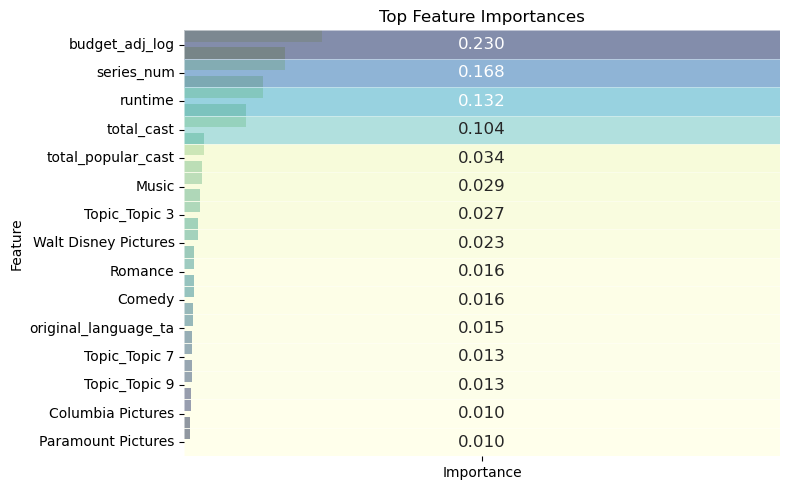

In [20]:
# Access the feature importances of Random Forest
feature_importances = adaboost_best.feature_importances_

# Create a list of feature names
feature_names = list(X_train.columns)

# Create a dictionary mapping feature names to importances
feature_importances_dict = dict(zip(feature_names, feature_importances))

# Sort the feature importances in descending order
sorted_feature_importances = sorted(feature_importances_dict.items(), key=lambda x: x[1], reverse=True)

# Select the top features and their importances
top_features = sorted_feature_importances[:15]  

# Create a dataframe with top features and importances
top_features_df = pd.DataFrame(top_features, columns=['Feature', 'Importance'])

# Sort the dataframe by importance in descending order
top_features_df = top_features_df.sort_values(by='Importance', ascending=False)

# Create the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=top_features_df, palette='YlGnBu')
plt.title('Top Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Add a heatmap on top of the bar chart
heatmap_data = top_features_df.set_index('Feature')
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', cbar=False, fmt=".3f", linewidths=0.5, alpha=0.5, annot_kws={"size": 12})

plt.tight_layout()
plt.show()


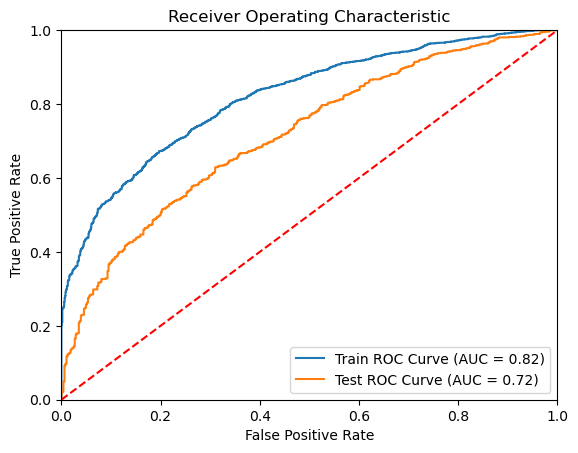

In [21]:
# Calculate the predicted probabilities for the positive class for train data
train_probabilities_ada = adaboost_best.predict_proba(X_train)[:, 1]

# Calculate the predicted probabilities for the positive class for test data
test_probabilities_ada = adaboost_best.predict_proba(X_test)[:, 1]

# Generate the ROC curve for train data
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_probabilities_ada)
train_auc = roc_auc_score(y_train, train_probabilities_ada)

# Generate the ROC curve for test data
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_probabilities_ada)
test_auc = roc_auc_score(y_test, test_probabilities_ada)

# Plot the ROC curves
plt.plot(train_fpr, train_tpr, label='Train ROC Curve (AUC = %0.2f)' % train_auc)
plt.plot(test_fpr, test_tpr, label='Test ROC Curve (AUC = %0.2f)' % test_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## Gradient Boosting

In [22]:
from sklearn.model_selection import StratifiedKFold

# Create an instance of GradientBoostingClassifier
gboost = GradientBoostingClassifier(n_estimators=100, random_state=2023)

# Fit the GradientBoostingClassifier to the training data
gboost.fit(X_train, y_train)

# Define the parameter grid for GridSearchCV
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth': [2, 4, 6]
}

# Create the GridSearchCV object with StratifiedKFold
grid_search = GridSearchCV(gboost, gb_param_grid, cv=StratifiedKFold(n_splits=10))

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best model from GridSearchCV
gs_best = grid_search.best_estimator_

# Calculate the accuracy of the best model on the train data
train_accuracy = accuracy_score(y_train, gs_best.predict(X_train))
print("Train Accuracy:", train_accuracy)

# Calculate the accuracy of the best model on the test data
test_accuracy = gs_best.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test data using the best model
y_pred_best = gs_best.predict(X_test)

# Generate classification report for the best model
report = classification_report(y_test, y_pred_best)
print("Classification Report:\n", report)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 300}
Train Accuracy: 0.7530244910002951
Test Accuracy: 0.6977869986168741
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.30      0.40       484
           1       0.72      0.90      0.80       962

    accuracy                           0.70      1446
   macro avg       0.66      0.60      0.60      1446
weighted avg       0.68      0.70      0.66      1446



**Model accuracy is slightly higher than other methods, recall is lower for negative label compare to Adaboost**

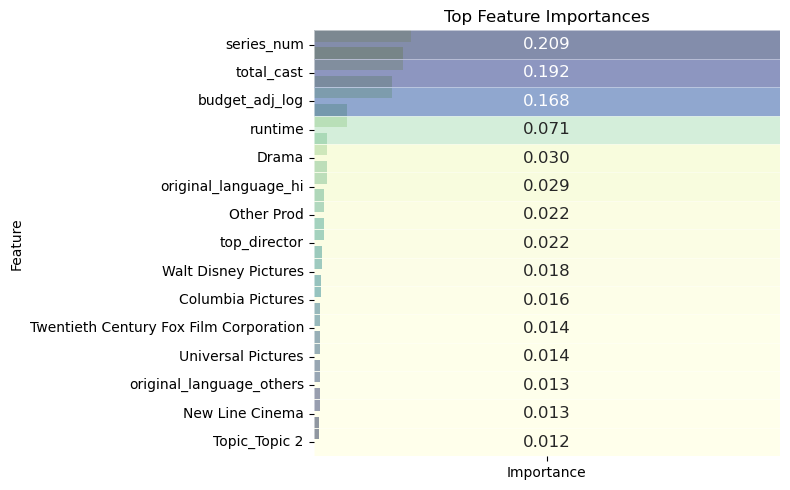

In [23]:
# Access the feature importances of Random Forest
feature_importances = gs_best.feature_importances_

# Create a list of feature names
feature_names = list(X_train.columns)

# Create a dictionary mapping feature names to importances
feature_importances_dict = dict(zip(feature_names, feature_importances))

# Sort the feature importances in descending order
sorted_feature_importances = sorted(feature_importances_dict.items(), key=lambda x: x[1], reverse=True)

# Select the top features and their importances
top_features = sorted_feature_importances[:15]  

# Create a dataframe with top features and importances
top_features_df = pd.DataFrame(top_features, columns=['Feature', 'Importance'])

# Sort the dataframe by importance in descending order
top_features_df = top_features_df.sort_values(by='Importance', ascending=False)

# Create the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=top_features_df, palette='YlGnBu')
plt.title('Top Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Add a heatmap on top of the bar chart
heatmap_data = top_features_df.set_index('Feature')
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', cbar=False, fmt=".3f", linewidths=0.5, alpha=0.5, annot_kws={"size": 12})

plt.tight_layout()
plt.show()


## Oversampling

In [24]:
# Oversampling SMOTE
smote = SMOTE(random_state=2023)

# Apply SMOTE to the training data
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

In [25]:
# Create the AdaBoostClassifier with the base estimator
base_estimator = tree.DecisionTreeClassifier()
ada_boost = ensemble.AdaBoostClassifier(base_estimator=base_estimator, random_state=2023)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'algorithm': ['SAMME', 'SAMME.R'],
    'base_estimator__max_depth': [2, 3, 4]
}

# Create the GridSearchCV object with StratifiedKFold
grid_search = GridSearchCV(ada_boost, param_grid, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=2023))

# Fit the GridSearchCV on the training data
grid_search.fit(X_train_oversampled, y_train_oversampled)

# Get the best model from GridSearchCV
adaboost_best_os = grid_search.best_estimator_

# Make predictions on the train data
y_train_pred = adaboost_best_os.predict(X_train_oversampled)

# Calculate the train accuracy
train_accuracy = accuracy_score(y_train_oversampled, y_train_pred)
print("Train Accuracy:", train_accuracy)

# Make predictions on the test data
y_test_pred = adaboost_best_os.predict(X_test)

# Calculate the accuracy on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Generate the classification report
report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(report)


Train Accuracy: 0.8539593249675466
Test Accuracy: 0.665283540802213
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.53      0.51       484
           1       0.76      0.73      0.74       962

    accuracy                           0.67      1446
   macro avg       0.63      0.63      0.63      1446
weighted avg       0.67      0.67      0.67      1446



In [26]:
# Create an instance of GradientBoostingClassifier
gboost = GradientBoostingClassifier(n_estimators=100, random_state=2023)

# Fit the GradientBoostingClassifier to the training data
gboost.fit(X_train_oversampled, y_train_oversampled)

# Define the parameter grid for GridSearchCV
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth': [2, 4, 6]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(gboost, gb_param_grid, cv=5)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train_oversampled, y_train_oversampled)

# Get the best model from GridSearchCV
gs_best = grid_search.best_estimator_

# Calculate the accuracy of the best model on the train data
train_accuracy = accuracy_score(y_train_oversampled, gs_best.predict(X_train_oversampled))
print("Train Accuracy:", train_accuracy)

# Calculate the accuracy of the best model on the test data
test_accuracy = gs_best.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test data using the best model
y_pred_best = gs_best.predict(X_test)

# Generate classification report for the best model
report = classification_report(y_test, y_pred_best)
print("Classification Report:\n", report)


Train Accuracy: 0.9597576806577239
Test Accuracy: 0.6784232365145229
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.48      0.50       484
           1       0.75      0.78      0.76       962

    accuracy                           0.68      1446
   macro avg       0.64      0.63      0.63      1446
weighted avg       0.67      0.68      0.68      1446



# Appendix:  Other attempts

**Perform cross-validation for decision trees with different depths**


In [27]:
#
# Define the decision tree classifiers with different depths
clf = []
desc = []

for d in [2, 3, 4]:
    clf.append(tree.DecisionTreeClassifier(criterion='entropy', max_depth=d))
    desc.append('Decision Tree with depth = ' + str(d))

# Define the cross-validation method
kf = model_selection.KFold(n_splits=10, shuffle=True)

# Perform cross-validation on the training data
for i in range(len(clf)):
    print('-' * len(desc[i]))
    print(desc[i])
    print('-' * len(desc[i]))
    print('**Using KFold with shuffle')
    score = model_selection.cross_val_score(clf[i], X_train, y_train, cv=kf)
    score_format = list(map(lambda x: round(x, 3), score))
    print('        score:', score_format)
    print('        mean: %.3f, standard deviation: %.3f' % (np.mean(score), np.std(score)))

    # Fit the best model on the training data
    best_model = clf[i]
    best_model.fit(X_train, y_train)

    # Evaluate the best model on the test data
    test_score = best_model.score(X_test, y_test)
    print('        test score: %.3f' % test_score)


----------------------------
Decision Tree with depth = 2
----------------------------
**Using KFold with shuffle
        score: [0.726, 0.661, 0.714, 0.69, 0.681, 0.667, 0.699, 0.673, 0.684, 0.624]
        mean: 0.682, standard deviation: 0.027
        test score: 0.665
----------------------------
Decision Tree with depth = 3
----------------------------
**Using KFold with shuffle
        score: [0.67, 0.711, 0.687, 0.673, 0.617, 0.673, 0.687, 0.69, 0.696, 0.716]
        mean: 0.682, standard deviation: 0.026
        test score: 0.665
----------------------------
Decision Tree with depth = 4
----------------------------
**Using KFold with shuffle
        score: [0.723, 0.637, 0.702, 0.67, 0.705, 0.67, 0.702, 0.72, 0.69, 0.663]
        mean: 0.688, standard deviation: 0.026
        test score: 0.676


## Bagging

In [28]:

# Create an instance of BaggingClassifier
bagging = ensemble.BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=5, oob_score=True, random_state=2023)

# Fit the BaggingClassifier to the training data
bagging.fit(X_train, y_train)

# Calculate the accuracy of the BaggingClassifier on the test data
accuracy = bagging.score(X_test, y_test)

# Print the accuracy
print("Accuracy:", accuracy)



Accuracy: 0.6666666666666666


## Find optimal hyperparameter one by one 


In [29]:
score_list = []
for max_depth in range(1, 50):
    clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0, max_depth=max_depth)
    clf = clf.fit(X_train, y_train)
    Dt_Score = clf.score(X_test, y_test)
    print('With Max-Depth {}, the decision tree score: {}'.format(max_depth, round(Dt_Score, 4)))
    score_list.append(Dt_Score)

score_list = np.array(score_list)
max_index = np.argmax(score_list)
max_value = score_list[max_index]
max_depth = max_index + 1

print('\nThe maximum score {} can first be obtained at tree depth {}'\
      .format(max_value, max_depth))


max_list = np.where(score_list == np.max(score_list))[0] + 1

score_list = []
for split_num in range(1, 20):
    clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0, max_depth=max_depth,
                                      min_samples_leaf=split_num*0.01,
                                      min_samples_split=split_num*0.01)
    clf = clf.fit(X_train, y_train)
    Dt_Score = clf.score(X_test, y_test)
    print('Max-Depth {}, Split Ratio {}%, DT Score: {}'.format(max_depth, split_num, round(Dt_Score, 4)))
    score_list.append(Dt_Score)

score_list = np.array(score_list)
best_split = np.argmax(score_list[::-1]) + 1

print('\nThe maximum score {} can be obtained at tree depth {} and split ratio {}%.'\
      .format(np.max(score_list), max_depth, best_split))


With Max-Depth 1, the decision tree score: 0.6653
With Max-Depth 2, the decision tree score: 0.6653
With Max-Depth 3, the decision tree score: 0.6653
With Max-Depth 4, the decision tree score: 0.6757
With Max-Depth 5, the decision tree score: 0.6763
With Max-Depth 6, the decision tree score: 0.6722
With Max-Depth 7, the decision tree score: 0.677
With Max-Depth 8, the decision tree score: 0.6667
With Max-Depth 9, the decision tree score: 0.6798
With Max-Depth 10, the decision tree score: 0.6632
With Max-Depth 11, the decision tree score: 0.6598
With Max-Depth 12, the decision tree score: 0.6521
With Max-Depth 13, the decision tree score: 0.6598
With Max-Depth 14, the decision tree score: 0.63
With Max-Depth 15, the decision tree score: 0.6349
With Max-Depth 16, the decision tree score: 0.6162
With Max-Depth 17, the decision tree score: 0.6141
With Max-Depth 18, the decision tree score: 0.621
With Max-Depth 19, the decision tree score: 0.6259
With Max-Depth 20, the decision tree score: 